In [1]:
import pandas as pd
import seaborn as sns 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import cobra

In [2]:
model_fn = '../models/e_coli/iJO1366.xml'
model = cobra.io.read_sbml_model(model_fn)

OSError: The file with '../models/e_coli/iJO1366.xml' does not exist, or is not an SBML string. Provide the path to an existing SBML file or a valid SBML string representation:


Assuming a maximum protein content of around 60% in E. coli [18] and an L-valine content of 7.4% of total cell protein [19].


In [ ]:
# AA fraction ecoli
# Glucose batch culture 
# https://onlinelibrary.wiley.com/doi/epdf/10.1002/%28SICI%291097-0290%2819981020%2960%3A2%3C230%3A%3AAID-BIT10%3E3.0.CO%3B2-Q

aa_fractions ={  'ala__L': 10.7,
                'arg__L': 5.1,
                'asp__L': 5.1,
                'asn__L': 5.1,
                'cys__L': 1.7,
                'glu__L': 5.8,
                'gln__L': 5.8,
                'gly': 8.5,
                'his__L': 1.8,
                'ile__L': 4.9,
                'leu__L': 9.4,
                'lys__L': 6.0,
                'met__L': 2.4,
                'phe__L': 3.3,
                'pro__L': 3.8,
                'ser__L': 4.9,
                'thr__L': 5.3,
                'trp__L': 1.1,
                'tyr__L': 2.9,
                'val__L': 7.4}


# Get AA mol weights

In [ ]:
aa_mol_weight_dict = {}
for key in aa_fractions.keys():
    aa_mol_weight_dict[key] = model.metabolites.get_by_id(f'{key}_c').formula_weight
aa_mol_weight_dict    

In [3]:
rel_to_info = {
    'REL01': {'M': 'M1', 'CS': 'Galactose'},
    'REL02': {'M': 'M2', 'CS': 'Galactose'},
    'REL03': {'M': 'M3', 'CS': 'Galactose'},
    'REL04': {'M': 'M5', 'CS': 'L-malate'},
    'REL05': {'M': 'M6', 'CS': 'L-malate'},
    'REL06': {'M': 'M7', 'CS': 'L-malate'},
    'REL07': {'M': 'M9', 'CS': 'L-alanine'},
    'REL08': {'M': 'M10', 'CS': 'L-alanine'},
    'REL09': {'M': 'M11', 'CS': 'L-alanine'}
    }
M_to_rel = {dic['M']:rel for rel, dic in rel_to_info.items()}


In [6]:
df = pd.read_csv('long_table.csv', index_col=0)

In [7]:
df.Hours.replace(9,9.25, inplace=True)

In [8]:
folder = Path('/Users/ssulheim/Library/CloudStorage/OneDrive-UniversitédeLausanne/UNIL/leakage/experimental work/sintef_sept_23/exometabolome')
mapping_fn = folder / 'met_to_bigg.csv'
mapping_dict = pd.read_csv(mapping_fn, index_col = 0).to_dict()['BiGG ID']

In [9]:
mapping_dict

{'SEBACOYL-L-CARNITINE (C10-DC)': nan,
 'DEOXYCARNITINE (DEOXY-C0)': 'gbbtn',
 'GLUTARYLCARNITINE (C5-DC)': nan,
 'ALPHA-AMINOBUTYRATE': nan,
 'CREATINE': 'crn',
 'ALPHA-AMINOADIPATE': nan,
 'CIS-ACONITATE': 'acon_C',
 'CITRATE': 'cit',
 'HEXOSES including Glucose and Fructose': 'fru',
 'GLUTARATE': nan,
 'ISOCITRATE': 'icit',
 'LACTATE': 'lac__L',
 'MALATE': 'mal__L',
 'NAD': 'nad',
 'SUCCINATE': 'succ',
 'TRANS-ACONITATE': 'acon_T',
 'ASPARAGINE': 'asn__L',
 'ASPARTATE': 'asp__L',
 'BETA-ALANINE': 'ala_B',
 'GAMMA-AMINOBUTYRATE': '4abut',
 'GLUTAMATE': 'glu__L',
 'GLUTAMINE': 'gln__L',
 'GLYCINE': 'gly',
 'ISOLEUCINE': 'ile__L',
 'LEUCINE': 'leu__L',
 'LYSINE': 'lys__L',
 'METHIONINE': 'met__L',
 'PHENYLALANINE': 'phe__L',
 'PIPECOLIC ACID': nan,
 'PROLINE': 'pro__L',
 'SERINE': 'ser__L',
 'TYROSINE': 'tyr__L',
 'VALINE': 'val__L',
 'ALANINE': 'ala__L',
 'PYRUVATE': 'pyr',
 'CITRULLINE': 'citr__L',
 'HISTIDINE': 'his__L',
 'MALONYLCARNITINE (C3:DC)': nan,
 'FRUCTOSE-6-PHOSPHATE': 'f6

In [10]:
df['BiGG ID'] = df['Metabolite'].map(mapping_dict)
df['Concentration [mM]'] = df['Concentration']*1e-3

In [11]:
df['Metabolite'] = df['Metabolite'].str.capitalize()
df['Metabolite'].replace('Nad', 'NAD', inplace=True)
df['Metabolite'].replace('L-serine', 'Serine', inplace=True)
df['Metabolite'].replace('Hexoses including glucose and fructose', 'Hexoses', inplace=True)
df.reset_index(inplace=True, drop=True)


In [12]:
mets = df.Metabolite.str.capitalize().unique()
mets.sort()

In [13]:
mets

array(['Alanine', 'Alpha-aminoadipate', 'Alpha-aminobutyrate',
       'Asparagine', 'Aspartate', 'Beta-alanine', 'Cis-aconitate',
       'Citrate', 'Creatine', 'Gamma-aminobutyrate', 'Glutamate',
       'Glutamine', 'Glutarate', 'Glycine', 'Hexoses', 'Isocitrate',
       'Isoleucine', 'Lactate', 'Leucine', 'Lysine', 'Malate',
       'Methionine', 'Nad', 'Phenylalanine', 'Pipecolic acid', 'Proline',
       'Pyruvate', 'Serine', 'Succinate', 'Trans-aconitate', 'Tyrosine',
       'Valine'], dtype=object)

# Remove some values 

In [14]:
succ_malate_idx = ((df.Metabolite=='Succinate')&(df['Carbon source']=='L-malate'))
idx_to_keep = (df.Concentration< 2e3) * ~succ_malate_idx

In [15]:
df = df.loc[idx_to_keep]

In [17]:
met_info = pd.read_csv('../../data/met_info_3.csv')

In [18]:
met_info['Intracellular concentration [mM]'] = met_info['Intracellular concentration [M]']*1e3
met_info.rename(columns={'Topological Polar Surface Area []': 'Topological Polar Surface Area'}, inplace=True)

In [20]:
gdw_df = pd.read_csv('gDW.csv', index_col=0)

In [19]:
gdw_df

,Hours,REL01,REL02,REL03,REL04,REL05,REL06,REL07,REL08,REL09
1,0.00,0.0154,0.01540,0.00525,0.01288,0.01148,0.00812,0.0102,0.0108,0.0057
2,2.00,0.0315,0.03150,0.02450,0.02520,0.01960,0.02240,0.0150,0.0150,0.0150
3,4.00,0.0595,0.05950,0.04200,0.04760,0.03080,0.03920,0.0240,0.0240,0.0210
4,6.00,0.1085,0.11200,0.07000,0.10080,0.07280,0.07840,0.0330,0.0360,0.0330
5,8.00,0.2030,0.20300,0.15750,0.24360,0.15680,0.16240,0.0480,0.0480,0.0450
6,9.25,NaN,NaN,NaN,0.44800,0.30800,0.33600,NaN,NaN,NaN
7,10.00,0.3990,0.36400,0.22750,0.61320,0.42560,0.50960,0.0720,0.0690,0.0660
8,11.00,0.4410,0.44450,0.28000,0.77000,0.60200,0.67480,0.0870,0.0870,0.0870
9,12.00,0.5705,0.56000,0.32900,0.71960,0.65800,0.76160,0.1020,0.0990,0.0960
10,13.00,0.7595,0.70000,0.41790,0.67200,0.67396,0.70252,NaN,NaN,NaN


# Merge dataframes


In [21]:
dfm = df.merge(met_info, left_on='Metabolite', right_on='Metabolite')

In [22]:
ecoli_dry_weight_per_cell = 3e-13# g # From https://ecmdb.ca/e_coli_stats
ecoli_cell_volume = 1e-15# L
culture_volume = 0.6


# Merge gDW to measured timepoints for all values in df
Use timepoint 3


In [23]:
gdw_df['Hours'] = np.round(gdw_df['Hours'], 2)
gdw_dict = gdw_df.set_index('Hours').to_dict('index')

In [24]:
dfm['REL'] = dfm.M.map(M_to_rel)

In [25]:
gdw_list = []
for i, row in dfm.iterrows():
    hours = row['Hours']
    rel = row['REL']
    if np.isnan(hours) or isinstance(rel, float):
        gdw_list.append(np.nan)
    else:
        gdw_list.append(gdw_dict[hours][rel])
dfm['gDW/L'] = gdw_list

In [26]:
dfm['gDW'] = dfm['gDW/L']*culture_volume

In [27]:
dfm['N cells'] = dfm['gDW']/ecoli_dry_weight_per_cell
dfm['Cell volume'] = dfm['N cells']* ecoli_cell_volume

# Fraction of cells (r) needed to match measured values
$C_i * CV * r = C_e * RV$

$r = \frac{C_e*RV}{C_i*CV}$

In [28]:
dfm['Ratio of lysed cells needed'] = (dfm['Concentration [mM]']*culture_volume)/(dfm['Intracellular concentration [mM]']*dfm['Cell volume'])

In [29]:
idx = dfm.Timepoint.isin([2,3])# & (dfm.Concentration< 2e3)
idx0 = dfm['Ratio of lysed cells needed'].notna()
dfm3 = dfm.loc[idx*idx0].copy()


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


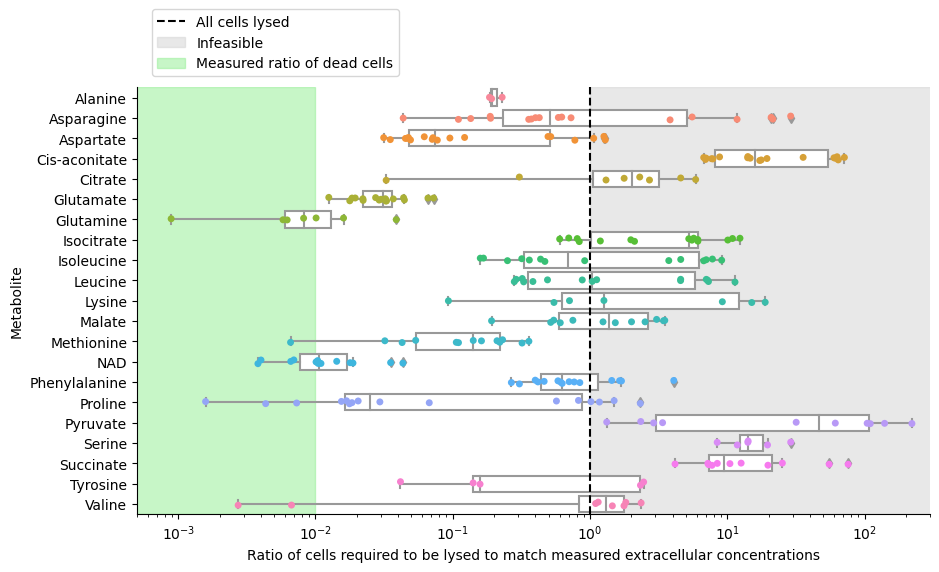

In [34]:
# sns.catplot(data = dfm3, x = 'Ratio of lysed cells needed', y = 'Metabolite', height=4, aspect=1.9, color = 'C0')
dfm3.sort_values('Metabolite', inplace=True)
sns.catplot(data = dfm3, x = 'Ratio of lysed cells needed', y = 'Metabolite', color = 'w', 
            height=5, aspect=1.9, kind = 'box')
sns.stripplot(data = dfm3, x = 'Ratio of lysed cells needed', y = 'Metabolite')#, color = 'C0')
plt.semilogx()
plt.xlabel('Ratio of cells required to be lysed to match measured extracellular concentrations')
plt.axvline(1, c = 'k', ls = '--', label = 'All cells lysed')
plt.axvspan(1, 5e2, color = 'lightgray', alpha = 0.5, label = 'Infeasible', zorder = 0)
plt.axvspan(1*1e-4, 1e-2, color = 'lightgreen', alpha = 0.5, label = 'Measured ratio of dead cells', zorder = 0)
plt.legend(loc = 'lower left', bbox_to_anchor = (0.01,1.01))
plt.xlim(5e-4, 3e2)
# plt.xlim(7e-4, 3e2)
plt.savefig('ratio_of_dead_cells.png', dpi = 400,bbox_inches="tight")
plt.show()

# From digestion of proteome

$X_{aa} = gDW*prot\_fraction*aa\_fraction/aa_{mw}$

## Fraction of cells needed to match exometabolome
$X_{aa} * r = C_e * RV$


In [38]:
prot_fraction = 0.55 #g/gdw Used in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8546978/ 
# The actual ref is https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3910158/



In [44]:
aa_amount_list = []
aa_amount_list_g = []
for i, row in dfm3.iterrows():
    bigg_id = row['BiGG ID']
    try:
        aa_percent = aa_fractions[bigg_id]
        aa_fraction = aa_percent/100
        # Substract weight of h2o because it is lost during protein polymerization
        mol_weight = aa_mol_weight_dict[bigg_id] - 18.02
    except KeyError:
        X_aa = np.nan
        X_aa_g = np.nan
    else:
        X_aa = row['gDW']*prot_fraction*aa_fraction/mol_weight
        X_aa_g = row['gDW']*prot_fraction*aa_fraction
    aa_amount_list.append(X_aa)
    aa_amount_list_g.append(X_aa_g)
dfm3['X_aa [mmol]'] = [x*1e3 for x in aa_amount_list]
dfm3['X_aa [g]'] = aa_amount_list_g


In [45]:
dfm3

,Sample_ID,USER CODE,Carbon source,Timepoint-tag,Metabolite,Concentration,Hours,Timepoint,M,BiGG ID,...,Ref,Intracellular concentration [mM],REL,gDW/L,gDW,N cells,Cell volume,Ratio of lysed cells needed,X_aa [mmol],X_aa [g]
302,SM_MPTA_112023_49_L-malate-T10_M5_19,#49: L-malate-T10 M5,L-malate,T3,Alanine,1.193908,10.0,3,M5,ala__L,...,"Bennet et al, glucose",2.550,REL04,0.6132,0.36792,1.226400e+12,0.001226,0.229060,0.304645,0.021652
301,SM_MPTA_112023_75_Galactose-T16_M3_9,#75: Galactose-T16 M3,Galactose,T3,Alanine,1.186250,16.0,3,M3,ala__L,...,"Bennet et al, glucose",2.550,REL03,0.7532,0.45192,1.506400e+12,0.001506,0.185288,0.374199,0.026595
300,SM_MPTA_112023_64_Galactose-T14_M1_7,#64: Galactose-T14 M1,Galactose,T3,Alanine,1.650079,14.0,3,M1,ala__L,...,"Bennet et al, glucose",2.550,REL01,1.0115,0.60690,2.023000e+12,0.002023,0.191920,0.502525,0.035716
452,SM_MPTA_112023_75_Galactose-T16_M3_9,#75: Galactose-T16 M3,Galactose,T3,Asparagine,0.055880,16.0,3,M3,asn__L,...,"Bennet et al, glucose",0.511,REL03,0.7532,0.45192,1.506400e+12,0.001506,0.043556,0.111101,0.012676
473,SM_MPTA_112023_90_L-alanine-T18_M11_33,#90: L-alanine-T18 M11,L-alanine,T3,Asparagine,3.656743,18.0,3,M11,asn__L,...,"Bennet et al, glucose",0.511,REL09,0.3870,0.23220,7.740000e+11,0.000774,5.547327,0.057084,0.006513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,SM_MPTA_112023_90_L-alanine-T18_M11_33,#90: L-alanine-T18 M11,L-alanine,T3,Valine,7.543881,18.0,3,M11,val__L,...,"Bennet et al, glucose",4.020,REL09,0.3870,0.23220,7.740000e+11,0.000774,1.454719,0.095338,0.009451
205,SM_MPTA_112023_75_Galactose-T16_M3_9,#75: Galactose-T16 M3,Galactose,T3,Valine,0.067505,16.0,3,M3,val__L,...,"Bennet et al, glucose",4.020,REL03,0.7532,0.45192,1.506400e+12,0.001506,0.006688,0.185553,0.018393
204,SM_MPTA_112023_64_Galactose-T14_M1_7,#64: Galactose-T14 M1,Galactose,T3,Valine,0.037036,14.0,3,M1,val__L,...,"Bennet et al, glucose",4.020,REL01,1.0115,0.60690,2.023000e+12,0.002023,0.002732,0.249185,0.024701
215,SM_MPTA_112023_79_L-alanine-T16_M9_28,#79: L-alanine-T16 M9,L-alanine,T2,Valine,6.328589,16.0,2,M9,val__L,...,"Bennet et al, glucose",4.020,REL07,0.2670,0.16020,5.340000e+11,0.000534,1.768849,0.065776,0.006520


In [47]:
dfm3['Ratio of lysed cells needed (proteome)'] = (dfm3['Concentration [mM]']*culture_volume)/(dfm3['X_aa [mmol]'])

In [50]:
dfm4 = dfm3.loc[dfm3['Ratio of lysed cells needed (proteome)'].notna()]

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


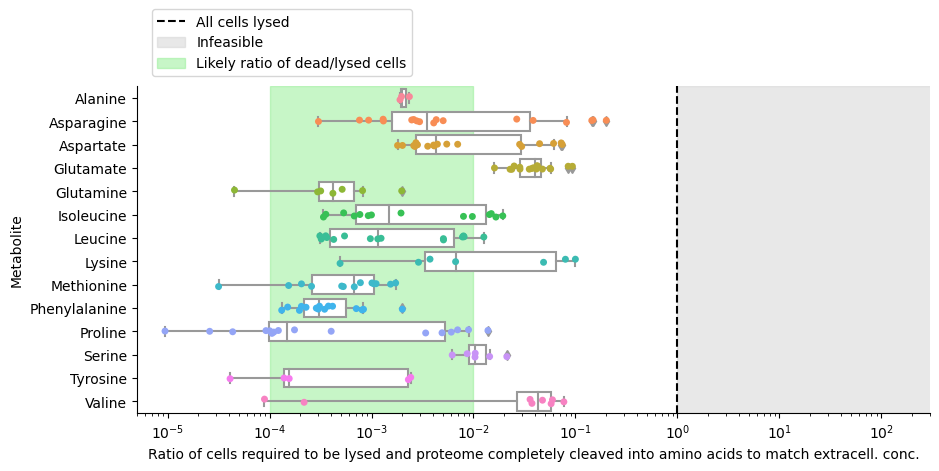

In [67]:
# sns.catplot(data = dfm3, x = 'Ratio of lysed cells needed', y = 'Metabolite', height=4, aspect=1.9, color = 'C0')
sns.catplot(data = dfm4, x = 'Ratio of lysed cells needed (proteome)', y = 'Metabolite', color = 'w', 
            height=4, aspect=1.9*5/4, kind = 'box')
sns.stripplot(data = dfm4, x = 'Ratio of lysed cells needed (proteome)', y = 'Metabolite')#, color = 'C0')
plt.semilogx()
plt.xlabel('Ratio of cells required to be lysed and proteome completely cleaved into amino acids to match extracell. conc.')
plt.axvline(1, c = 'k', ls = '--', label = 'All cells lysed')
plt.axvspan(1, 5e2, color = 'lightgray', alpha = 0.5, label = 'Infeasible', zorder = 0)
plt.axvspan(1*1e-4, 1e-2, color = 'lightgreen', alpha = 0.5, label = 'Likely ratio of dead/lysed cells', zorder = 0)
plt.legend(loc = 'lower left', bbox_to_anchor = (0.01,1.01))
plt.xlim(5e-6, 3e2)

plt.legend(loc = 'lower left', bbox_to_anchor = (0.01,1.01))
# plt.xlim(7e-4, 5e2)
plt.savefig('ratio_of_dead_cells_proteome.png', dpi = 400,bbox_inches="tight")
plt.show()


/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


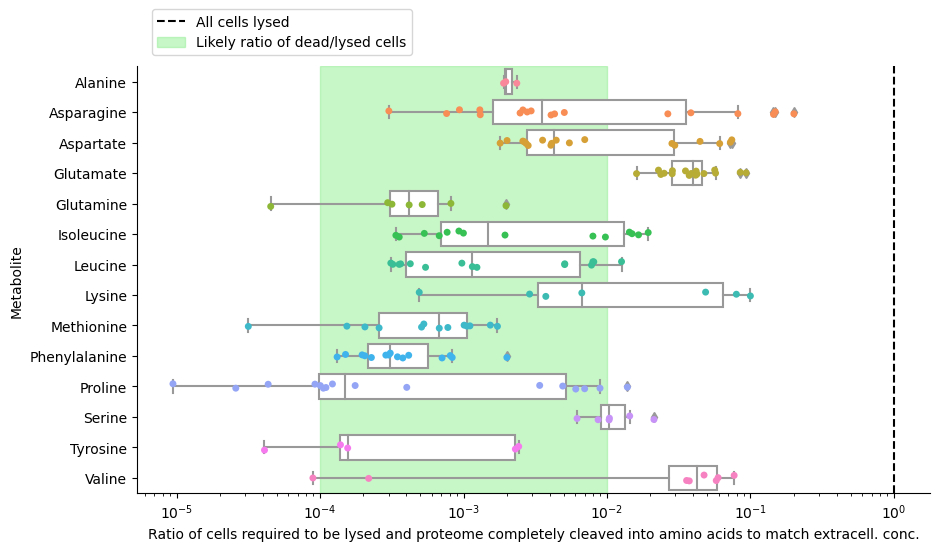

In [59]:
# sns.catplot(data = dfm3, x = 'Ratio of lysed cells needed', y = 'Metabolite', height=4, aspect=1.9, color = 'C0')
sns.catplot(data = dfm4, x = 'Ratio of lysed cells needed (proteome)', y = 'Metabolite', color = 'w', 
            height=5, aspect=1.9, kind = 'box')
sns.stripplot(data = dfm4, x = 'Ratio of lysed cells needed (proteome)', y = 'Metabolite')#, color = 'C0')
plt.semilogx()
plt.xlabel('Ratio of cells required to be lysed and proteome completely cleaved into amino acids to match extracell. conc.')
plt.axvline(1, c = 'k', ls = '--', label = 'All cells lysed')
# plt.axvspan(1, 5e2, color = 'lightgray', alpha = 0.5, label = 'Infeasible', zorder = 0)
plt.axvspan(1e-4, 1e-2, color = 'lightgreen', alpha = 0.5, label = 'Likely ratio of dead/lysed cells', zorder = 0)
plt.legend(loc = 'lower left', bbox_to_anchor = (0.01,1.01))
# plt.xlim(7e-4, 5e2)
plt.savefig('ratio_of_dead_cells_proteome.png', dpi = 400,bbox_inches="tight")
plt.show()


In [208]:
# Rough estimate
gDW_per_L = 1
gDW = gDW_per_L*volume # Roughly half liter
total_N_cells = gDW/ecoli_dry_weight_per_cell
total_intracellular_volume = total_N_cells*ecoli_cell_volume

In [175]:
intracellular_amount_mmol = met_info['Intracellular concentration [mM]']*total_intracellular_volume

In [176]:
max_extracellular_conc = intracellular_amount_mmol/volume

In [177]:
met_info['Max conc from death [mM]'] = max_extracellular_conc

In [178]:
met_info.rename(columns={'Topological Polar Surface Area []': 'Topological Polar Surface Area'}, inplace=True)

In [190]:
dfm = df.merge(met_info, left_on='Metabolite', right_on='Metabolite')

In [191]:
dfmM = dfm.loc[dfm.Timepoint.isin([2,3])].groupby(['Metabolite', 'M']).max(['Max conc from death [mM]', 'Concentration'])

In [192]:
dfmM['Concentration [mM]'] = dfmM['Concentration']*1e-3

In [193]:
dfmM = dfmM.loc[(dfmM.Concentration < 2e3),:]

In [205]:
dfmM['Max contribution from death'] = dfmM['Max conc from death [mM]']/dfmM['Concentration [mM]']

/var/folders/h6/4b_zz_cd5d92w2ycp017ytn00000gp/T/ipykernel_21994/1300278743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft3['REL'] = dft3.M.map(M_to_rel)


In [215]:
for i, row in dft3.iterrows():
    pass

In [202]:
dfmM.reset_index(inplace=True)

In [203]:
dfmM = dfmM.loc[dfmM['Max contribution from death'].notna(),:]

/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ssulheim/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:1296: UserWarning: 62.5% of the points

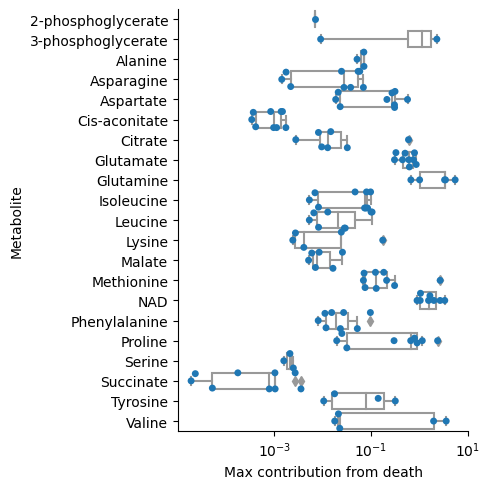

In [204]:
sns.catplot(data = dfmM, x = 'Max contribution from death', y = 'Metabolite', color = 'w', kind = 'box')
sns.swarmplot(data = dfmM, x = 'Max contribution from death', y = 'Metabolite', color = 'C0')
plt.semilogx()
plt.tight_layout()

In [169]:
gDW_per_OD = {
    'Galactose': 0.35, # gDW/L,
    'L-malate':  0.28,
    'L-alanine': 0.3
}
gDW_per_OD = 0.32 # Else




In [9]:
dfe

,M,Metabolite,Carbon source,Rate [mmol/gDW/h],Rate var,Metabolite value [gDW/mmol],N carbons,Mol weight [g/mol],Turnover [mmol/gDW/h],BiGG ID,...,Rate [mmol C/gDW/h],Rate [g/gDW/h],Metabolite value [gDW/mmol C],Metabolite value [gDW/g],log10(Rate [mmol C/gDW/h]),log10(Rate [g/gDW/h]),log10(Metabolite value [gDW/mmol C]),log10(Metabolite value [gDW/g]),Species - Carbon source,Intracellular concentration [mM]
0,M1,Phenylalanine,Galactose,0.000014,2.588807e-11,0.118664,9.0,165.18914,0.044543,phe__L,...,0.000128,2.346363e-06,0.013185,0.718352,-3.893344,-5.629605,-1.879924,-0.143663,E. coli - Galactose,1.820000e-08
1,M2,Phenylalanine,Galactose,0.000010,inf,0.118664,9.0,165.18914,0.044543,phe__L,...,0.000092,1.684826e-06,0.013185,0.718352,-4.037184,-5.773445,-1.879924,-0.143663,E. coli - Galactose,1.820000e-08
2,M3,Phenylalanine,Galactose,0.000019,1.429933e-10,0.118664,9.0,165.18914,0.044543,phe__L,...,0.000169,3.099379e-06,0.013185,0.718352,-3.772464,-5.508725,-1.879924,-0.143663,E. coli - Galactose,1.820000e-08
3,M6,Phenylalanine,L-malate,0.000012,inf,0.091308,9.0,165.18914,0.101902,phe__L,...,0.000108,1.982659e-06,0.010145,0.552748,-3.966491,-5.702752,-1.993734,-0.257472,E. coli - L-malate,1.820000e-08
4,M7,Phenylalanine,L-malate,0.000005,inf,0.091308,9.0,165.18914,0.101902,phe__L,...,0.000044,8.077311e-07,0.010145,0.552748,-4.356472,-6.092733,-1.993734,-0.257472,E. coli - L-malate,1.820000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,NaN,Orotate,Glucose,0.098852,NaN,0.034516,5.0,155.08832,0.220871,orot,...,0.494262,1.533085e-02,0.006903,0.222556,-0.306043,-1.814434,-2.160951,-0.652560,E. coli - Glucose,NaN
362,NaN,Fumarate,Glucose,0.000365,NaN,0.027664,4.0,114.05628,7.372616,fum,...,0.001461,4.165693e-05,0.006916,0.242545,-2.835372,-4.380313,-2.160148,-0.615207,E. coli - Glucose,1.150000e-07
365,NaN,Uracil,Glucose,-0.001443,NaN,0.052387,4.0,112.08676,0.000000,ura,...,-0.005773,-1.617641e-04,0.013097,0.467375,NaN,NaN,-1.882840,-0.330335,E. coli - Glucose,NaN
368,NaN,Alpha-ketoglutarate,Glucose,0.000521,NaN,0.036263,5.0,144.08226,12.349369,akg,...,0.002606,7.509063e-05,0.007253,0.251682,-2.584055,-4.124414,-2.139508,-0.599148,E. coli - Glucose,4.430000e-07
